In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [49]:
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [50]:
df.isnull().sum()
# NO NULL VALUE

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.dropna(subset=['director','country'],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [54]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [55]:
df.dtypes
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

## Content Type Distribution (Movies vs. TV Shows)

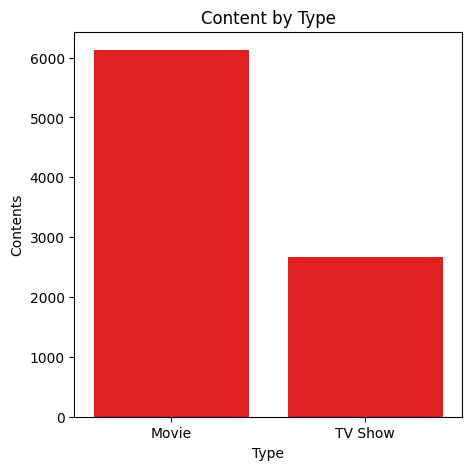

In [56]:
content_type = df['type'].value_counts()
# Create a bar chart for visualization
plt.figure(figsize=(5,5))
sns.barplot(x=content_type.index , y= content_type.values , color='r')
plt.xlabel('Type')
plt.ylabel('Contents')
plt.title("Content by Type")
plt.show()

## Most Common Genres

In [57]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [58]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
df['genres']

0                                         [Documentaries]
1       [Crime TV Shows,  International TV Shows,  TV ...
2                  [TV Dramas,  TV Horror,  TV Mysteries]
3                   [Children & Family Movies,  Comedies]
4       [Dramas,  Independent Movies,  International M...
                              ...                        
8785                 [International TV Shows,  TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows,  Romantic TV Shows,  ...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: genres, Length: 8790, dtype: object

In [59]:
all_genres = sum(df['genres'], [])
all_genres

['Documentaries',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 'Children & Family Movies',
 ' Comedies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'British TV Shows',
 ' Reality TV',
 'Comedies',
 ' Dramas',
 'Children & Family Movies',
 ' Comedies',
 ' Music & Musicals',
 'Dramas',
 ' International Movies',
 'Children & Family Movies',
 ' Music & Musicals',
 'Children & Family Movies',
 ' Comedies',
 'Children & Family Movies',
 ' Comedies',
 'Dramas',
 ' International Movies',
 ' Music & Musicals',
 'Movies',
 'Movies',
 'Movies',
 'Comedies',
 'Docuseries',
 ' Reality TV',
 'British TV Shows',
 ' Crime TV Shows',
 ' Docuseries',
 'Children & Family Movies',
 "Kids' TV",
 "Kids' TV",
 "Kids' TV",
 'Children & Family Movies',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Documentaries',
 ' International Movies',
 'Children & Family Movies',
 'Crime TV Shows',


In [60]:
# Top 10 most watched genres in the dataset are:
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_80536\2774275773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values,y=genre_counts.index,palette='Set3')


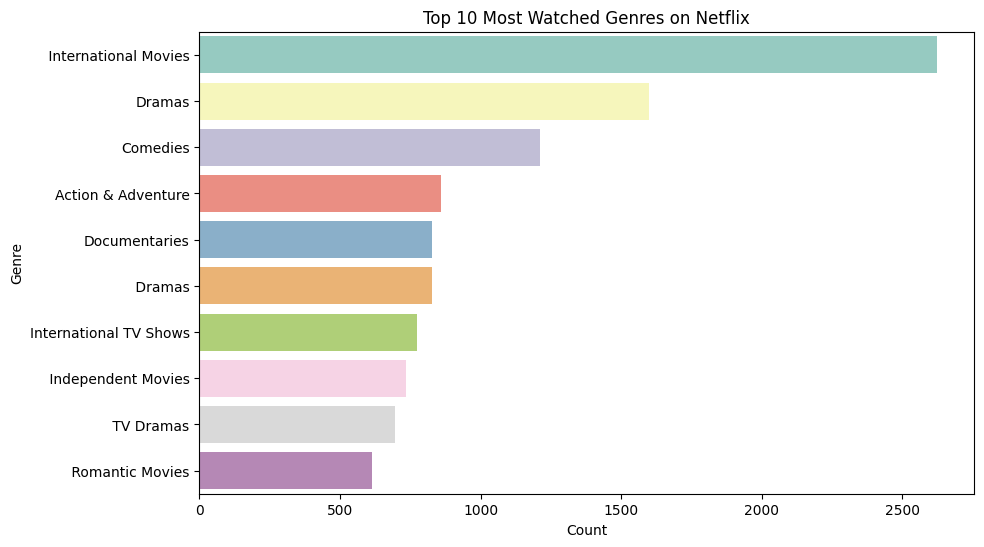

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values,y=genre_counts.index,palette='Set3')
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Content Added Over The Time

In [62]:
df['year_added']=df['date_added'].dt.year

C:\Users\ACER\AppData\Local\Temp\ipykernel_80536\2005020326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='Set3')


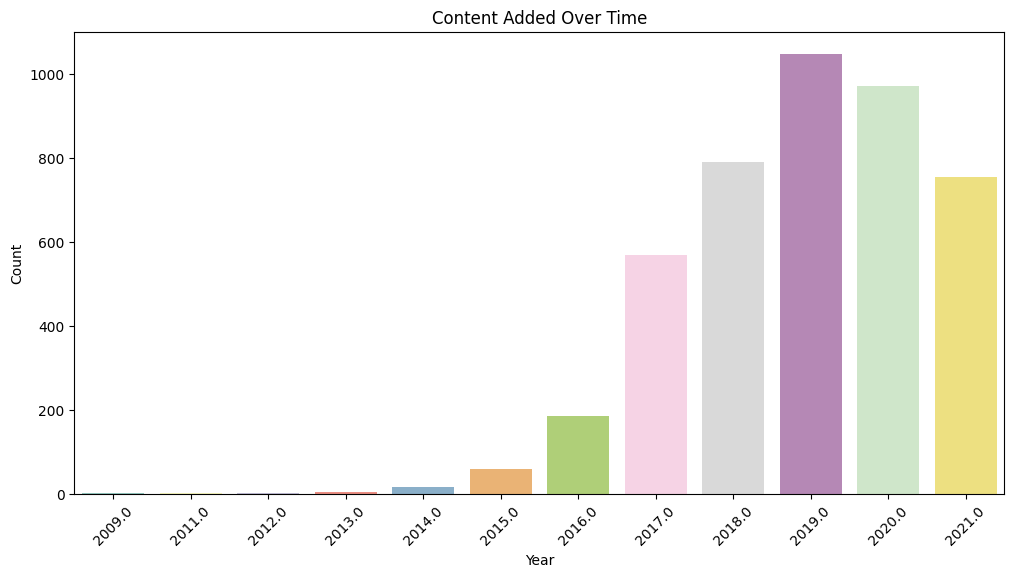

In [63]:
# Plot a graph:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='Set3')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##  Top 10 Directors with the Most Titles

In [64]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021.0


In [41]:
top_directors = df['director'].value_counts().head(11)

C:\Users\ACER\AppData\Local\Temp\ipykernel_80536\177134755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors[1:11].values,y=top_directors[1:11].index,


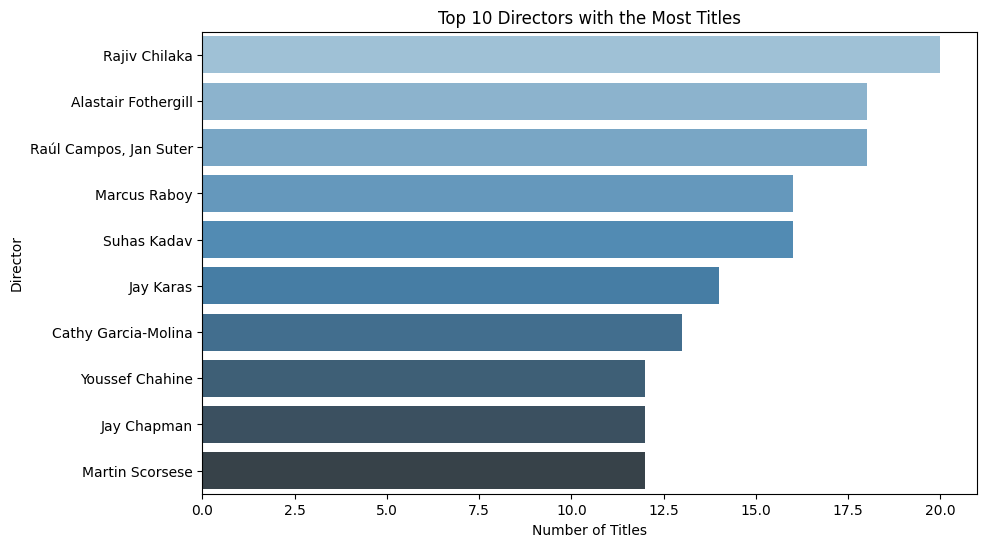

In [42]:
# Bar-Chart :
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors[1:11].values,y=top_directors[1:11].index,
palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

## Word Cloud of Movie Titles

In [43]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))

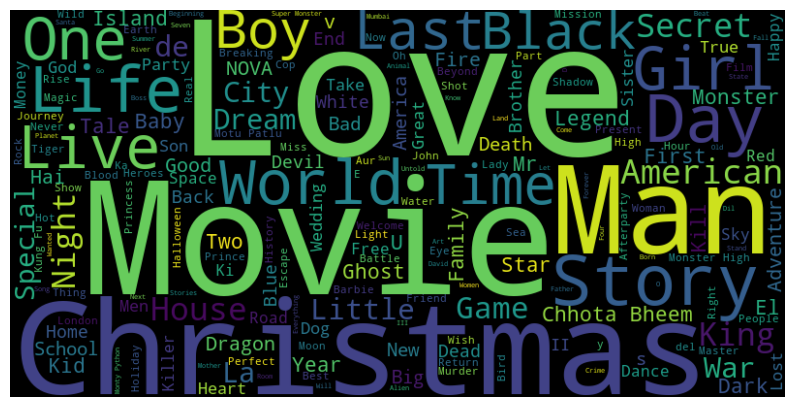

In [48]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Advance Analysis:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df =pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [65]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.shape

(8790, 10)

In [5]:
df=df.drop_duplicates() # removing the duplicates

Content distribution on Netflix

In [6]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

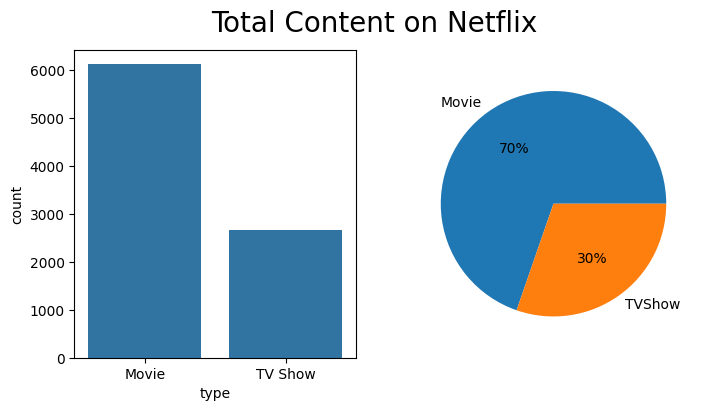

In [7]:
freq=df['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(df,x=df['type'],ax=axes[0])
plt.pie(freq,labels=['Movie','TVShow'],autopct='%.0f%%')
plt.suptitle('Total Content on Netflix',fontsize=20)

Rating frequency of movies & TV Shows on Netflix.

In [8]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [9]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


Text(0.5, 0.98, 'Rating on Netflix')

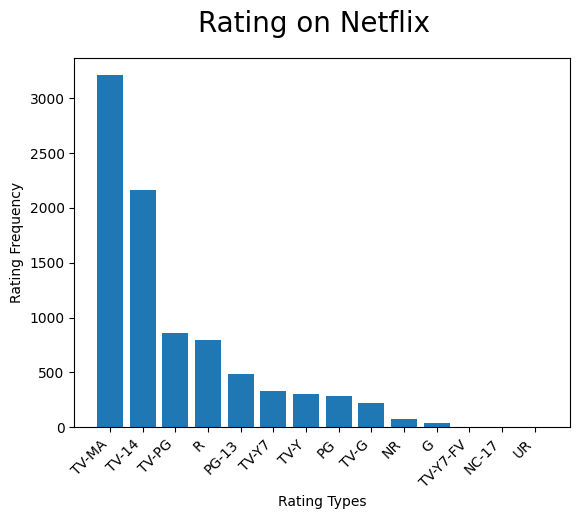

In [10]:
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

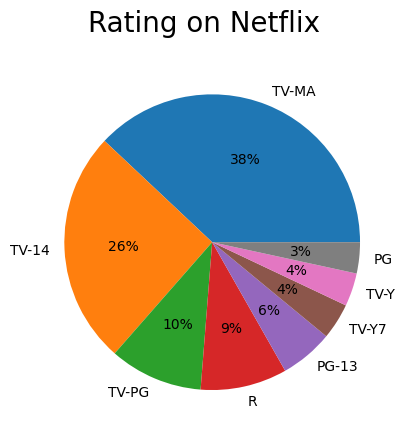

In [11]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [17]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [66]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

Monthly releases of Movies and TV shows on Netflix

In [67]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_movie_release

month
1.0     212
2.0     218
3.0     254
4.0     295
5.0     203
6.0     247
7.0     262
8.0     251
9.0     237
10.0    243
11.0    214
12.0    330
Name: count, dtype: int64

In [69]:
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()
monthly_series_release

month
1.0      86
2.0      88
3.0     141
4.0     135
5.0     109
6.0     142
7.0     112
8.0     117
9.0     137
10.0     98
11.0    103
12.0    170
Name: count, dtype: int64

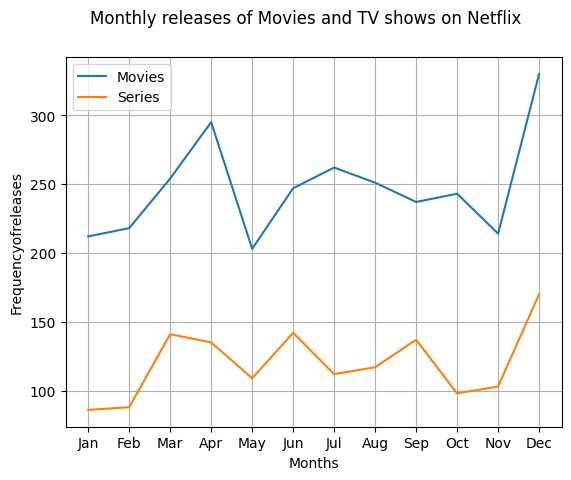

In [73]:
plt.plot(monthly_movie_release.index,monthly_movie_release.values,label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequencyofreleases")
plt.xticks(range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

Yearly releases of Movies and TV Shows on Netflix

In [74]:
yearly_movie_releases=df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['year'].value_counts().sort_index()

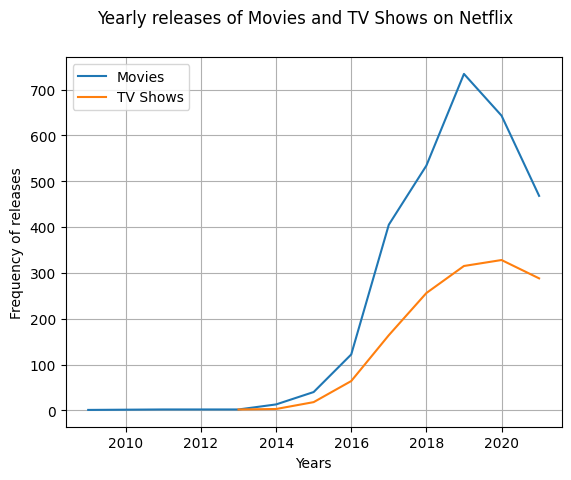

In [75]:
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index,yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

Top 10 popular movie genres

In [76]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

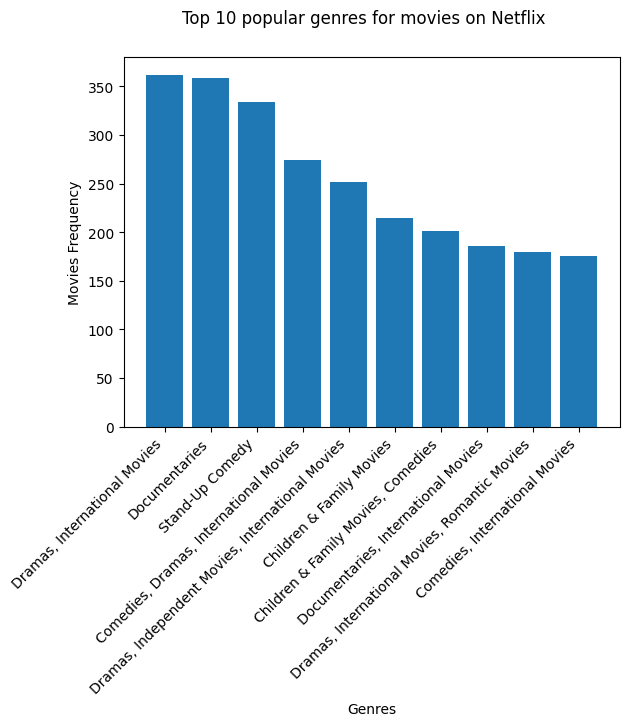

In [77]:
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

Top 10 TV Shows genres

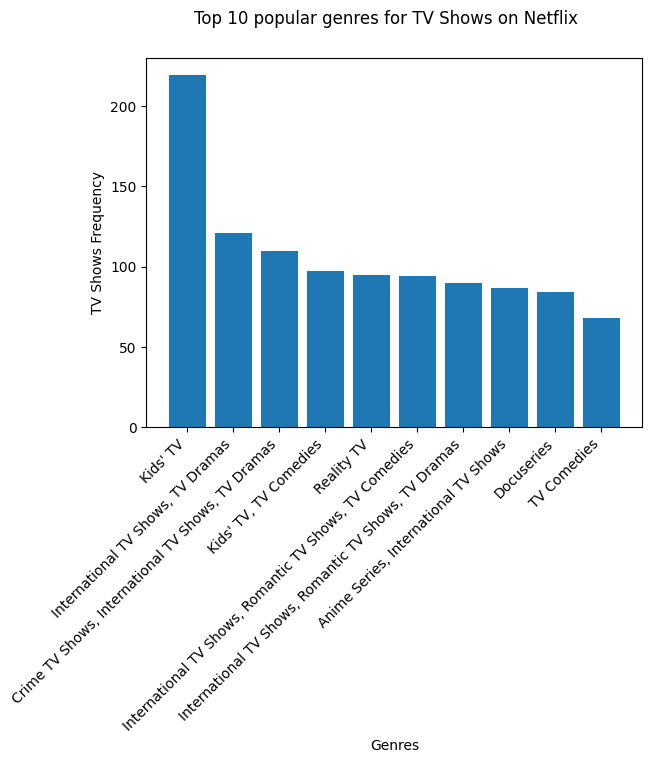

In [80]:
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

Top 15 directors across Netflix with high frequency of movies and shows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Don Michael Paul'),
  Text(12, 0, 'Mark Thornton, Todd Kauffman'),
  Text(13, 0, 'David Dhawan')])

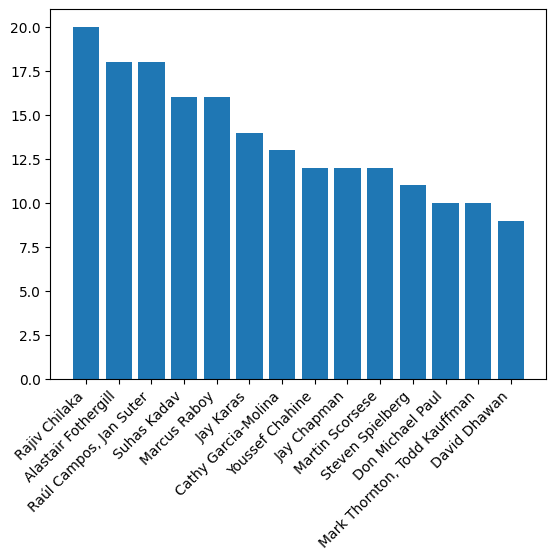

In [81]:
directors=df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')